# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

**Para realizar el taller:**

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python.

**Para el envío:**

Al terminar el taller, y dentro de las fechas especificadas en la plataforma de OLADE, debe subir este archivo a su perfil de **GitHub**. En la plataforma debe copiar el enlace a este archivo, a modo de entregable. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd

In [2]:
x=pd.DataFrame()      #Mejor hasta ahora

for m in range(1995,2018): 
    if m < 2016:
        o='.xlsx'
    else:
        o='.xls'
    if m < 2000:
        sK=3
    else:
        sK=2
    n='Precio_Bolsa_Nacional_($kwh)_' + str(m) + o
    y=pd.read_excel(n, skiprows=sK, parse_cols=24)
    x= x.append(y)
print(x.head())
print(x.tail())
print(str(len(x.index)) + ' Filas y ' + str(len(x.columns)) + ' Columnas')

        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
print('Hay un total de ' + str(len(x)-len(x.dropna())) + ' registros con datos faltantes.')

Hay un total de 28 registros con datos faltantes.


**3.--** Compute e imprima el número de registros duplicados.

In [4]:
print('Hay un total de ' + str(len(x)-len(x.drop_duplicates())) + ' registros con datos duplicados.')

Hay un total de 67 registros con datos duplicados.


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
print('Hay un total de ' + str(len(x))+' Registros.')
z=x.dropna().drop_duplicates()
print('Al eliminar los registros duplicados o con datos faltantes quedan ' + str(len(z))+' registros completos.')
print('Finalmente quedan ' + str((len(z)-len(z.dropna()))+(len(z)-len(z.drop_duplicates()))) +
      ' registros duplicados o con datos faltantes, es decir, ninguno.')

Hay un total de 7962 Registros.
Al eliminar los registros duplicados o con datos faltantes quedan 7875 registros rompletos.
Finalmente quedan 0 registros duplicados o con datos faltantes, es decir, ninguno.


**5.--** Compute y grafique el precio primedio diario.

In [6]:
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

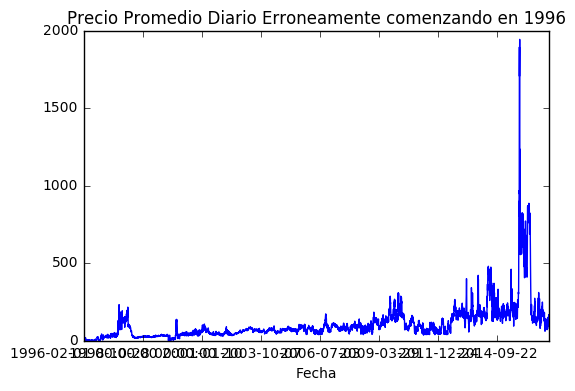

In [7]:
z['Prom']=z.mean(axis=1)
z.groupby('Fecha').mean()['Prom'].plot(kind='line', title='Precio Promedio Diario Erroneamente comenzando en 1996')

Ya que la grafica comienza en 1996, se corrigen los valores de la fecha para verla completa

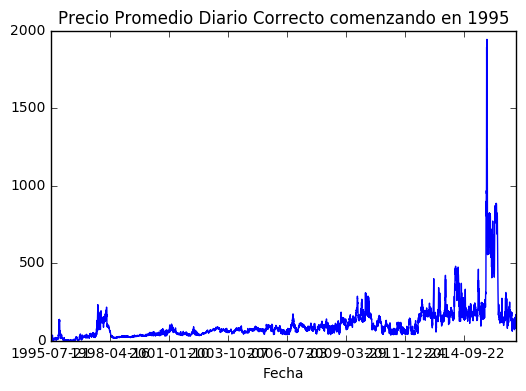

In [8]:
w=[]
for n in range(len(z['Fecha'])):
    w.append(str(z.iloc[n,0])[0:10])
z['Fecha']=w
z['Prom']=z.mean(axis=1)
 
z.groupby('Fecha').mean()['Prom'].plot(kind='line', title='Precio Promedio Diario Correcto comenzando en 1995', y='FFF')

**6.--** Compute y grafique el precio máximo por mes.

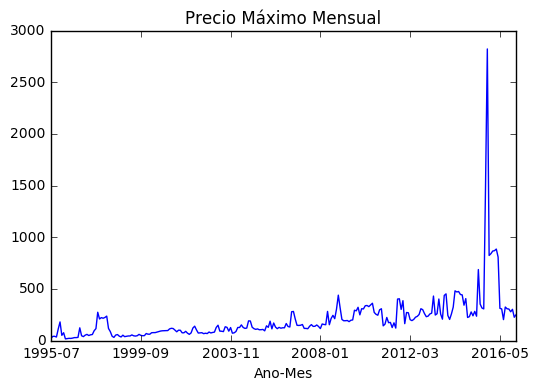

In [9]:
z['Max']=z.max(axis=1)
w=[]
for n in range(len(z['Fecha'])):
    w.append(str(z.iloc[n,0])[0:7])
z['Ano-Mes']=w
z.groupby('Ano-Mes').max()['Max'].plot(kind='line', title='Precio Máximo Mensual')

**7.--** Compute y grafique el precio mínimo mensual.

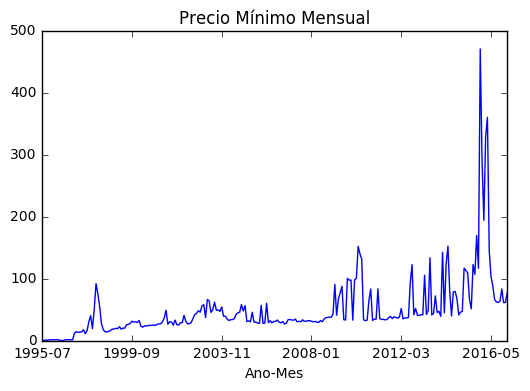

In [10]:
z['Min']=z.min(axis=1)
z.groupby('Ano-Mes').min()['Min'].plot(kind='line', title='Precio Mínimo Mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

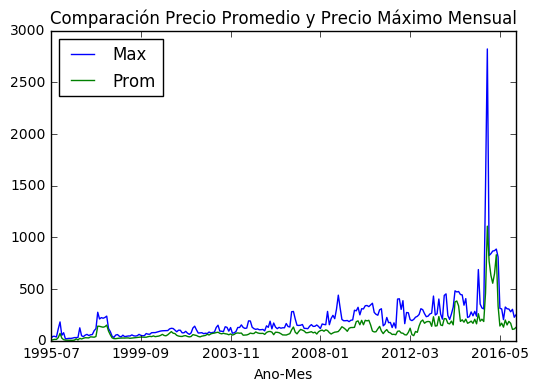

In [11]:
z.groupby('Ano-Mes').max()['Max'].plot(kind='line', legend='true')
z.groupby('Ano-Mes').mean()['Prom'].plot(kind='line', legend='true', title='Comparación Precio Promedio y Precio Máximo Mensual')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

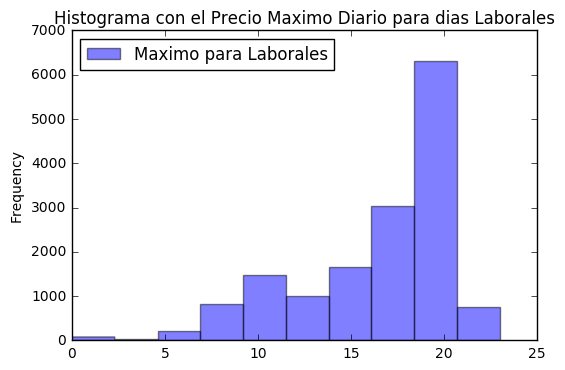

In [12]:
import datetime
w=[]
v=[]
for n in range(len(z['Fecha'])):
    temp=str(z.iloc[n,0])
    ano, mes, dia = temp.split('-')
    dia=str(dia)[0:3]
    year=int(ano)
    month=int(mes)
    day=int(dia)
    semnum=datetime.date(year, month, day).weekday()
    if semnum>4:
        Labor=0
    else:
        Labor=1
    w.append(semnum)
    v.append(Labor)
z['Semana']=w
z[['Semana']]=z[['Semana']].apply(pd.to_numeric)
z['Labor']=v
z[['Labor']]=z[['Labor']].apply(pd.to_numeric)
w=[]
w=z[z['Labor']==1]

v=[]

for n in range(len(w['Fecha'])):
    for m in range(1,25):
        if w.iloc[n,m]==w.iloc[n,26]:
            v.append(m-1)
            continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Laborales']=v
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para dias Laborales')

Este metodo tiene en cuenta el valor maximo diario, y todas las horas a las cuales se presenta.

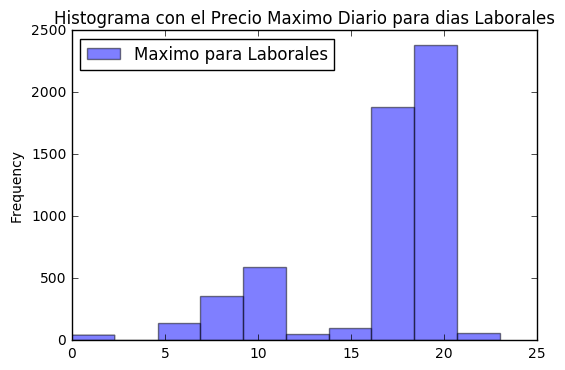

In [13]:
s=[]
zZ=[]
tT=[]
for n in range(len(w['Fecha'])):
    s=w.iloc[n].values[1:25]
    tT=[i for i, e in enumerate(s) if e == max(s)]
    zZ.append(tT[0])
    tT=[]
    continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Laborales']=zZ
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para dias Laborales')

Este metodo tiene en cuenta unicamente la primera hora a la cual se presenta el valor maximo en el dia

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

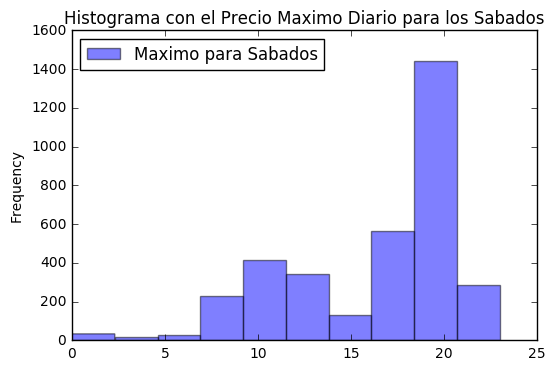

In [14]:
w=z[z['Semana']==5]

v=[]

for n in range(len(w['Fecha'])):
    for m in range(1,25):
        if w.iloc[n,m]==w.iloc[n,26]:
            v.append(m-1)
            continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Sabados']=v
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para los Sabados')

Este metodo tiene en cuenta el valor maximo diario, y todas las horas a las cuales se presenta.

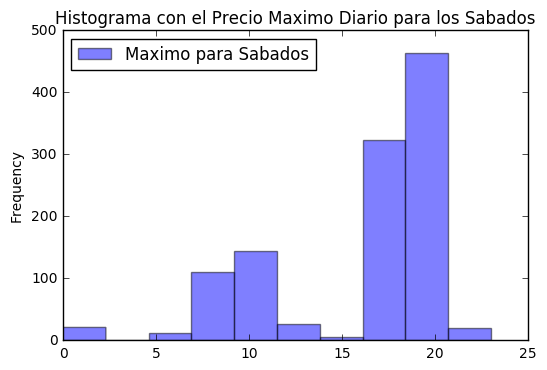

In [15]:
s=[]
zZ=[]
tT=[]
for n in range(len(w['Fecha'])):
    s=w.iloc[n].values[1:25]
    tT=[i for i, e in enumerate(s) if e == max(s)]
    zZ.append(tT[0])
    tT=[]
    continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Sabados']=zZ
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para los Sabados')

Este metodo tiene en cuenta unicamente la primera hora a la cual se presenta el valor maximo en el dia

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

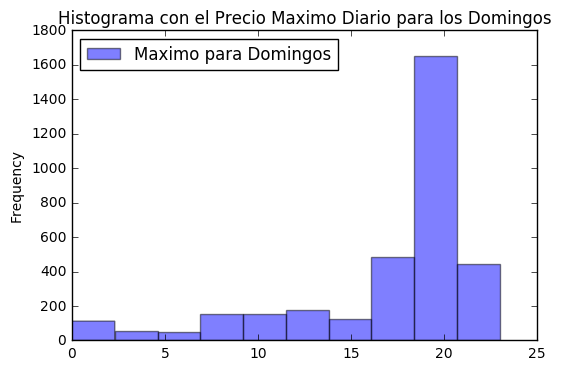

In [16]:
w=z[z['Semana']==6]

v=[]

for n in range(len(w['Fecha'])):
    for m in range(1,25):
        if w.iloc[n,m]==w.iloc[n,26]:
            v.append(m-1)
            continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Domingos']=v
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para los Domingos')

Este metodo tiene en cuenta el valor maximo diario, y todas las horas a las cuales se presenta.

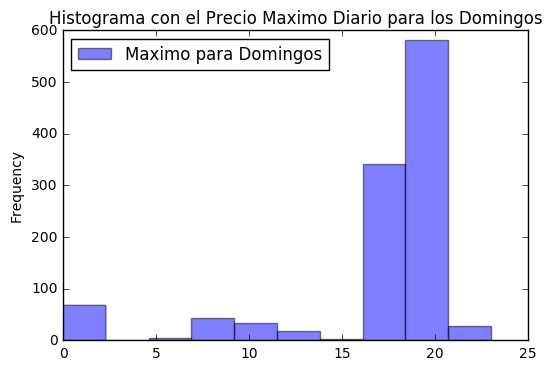

In [17]:
s=[]
zZ=[]
tT=[]
for n in range(len(w['Fecha'])):
    s=w.iloc[n].values[1:25]
    tT=[i for i, e in enumerate(s) if e == max(s)]
    zZ.append(tT[0])
    tT=[]
    continue
ParaHist=pd.DataFrame()
ParaHist['Maximo para Domingos']=zZ
ParaHist.plot.hist(alpha=0.5, title='Histograma con el Precio Maximo Diario para los Domingos')

Este metodo tiene en cuenta unicamente la primera hora a la cual se presenta el valor maximo en el dia

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [18]:
w=[]
for n in range(len(z['Fecha'])):
    w.append(str(z.iloc[n,0])[0:4])
z['Ano']=w
w=pd.DataFrame()
w=z.groupby(['Ano']).min()['Min']
w

Ano
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
Name: Min, dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [19]:
Lt=pd.DataFrame()
Lt['Fecha']=z['Fecha']
Lt['Ano-Mes']=z['Ano-Mes']
Lt['Prom']=z['Prom']

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


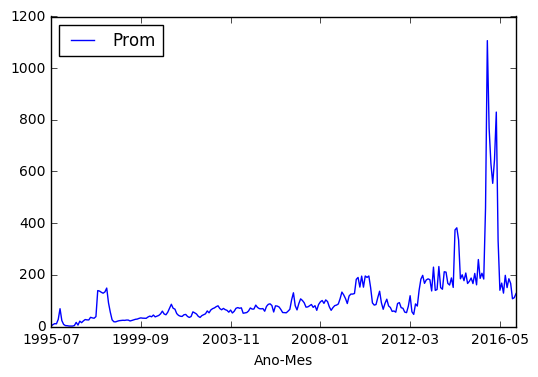

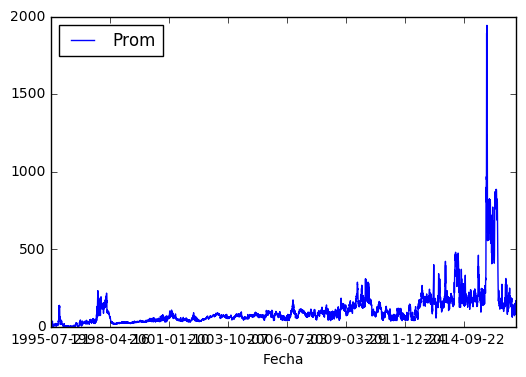

In [20]:
print(Lt.groupby(Lt['Ano-Mes']).mean().plot(kind='line',legend='false'))
print(Lt.groupby(Lt['Fecha']).mean().plot(kind='line',legend='false'))

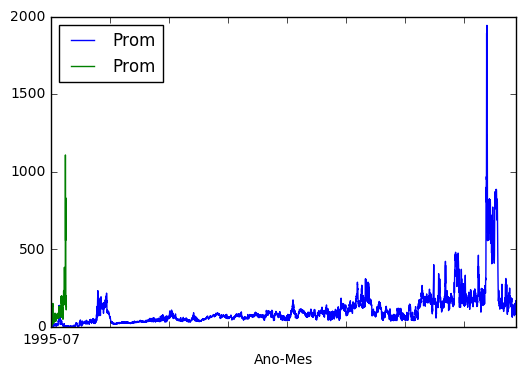

In [21]:
z.groupby('Fecha').mean()['Prom'].plot(kind='line', legend='false')
z.groupby('Ano-Mes').mean()['Prom'].plot(kind='line', legend='false')

Muchas gracias por su atencion

Juan G. Acosta G.

---